In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

## Loading and Ploting Data from CSV

In [2]:
X = pd.read_csv('dataset.csv', header=None).values
X

array([[ 2.51007584,  2.15930271],
       [ 3.73977608,  0.97417528],
       [-0.14293029,  2.96086573],
       ...,
       [-2.28276371, -2.82201987],
       [-0.84783419, -2.40019899],
       [-3.14650763, -2.8942918 ]], shape=(600, 2))

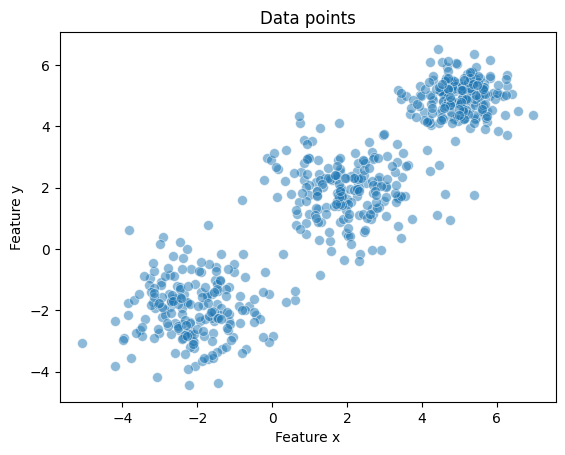

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=50, alpha=0.5)
plt.title('Data points')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()

## KMeans Clustering using sklearn

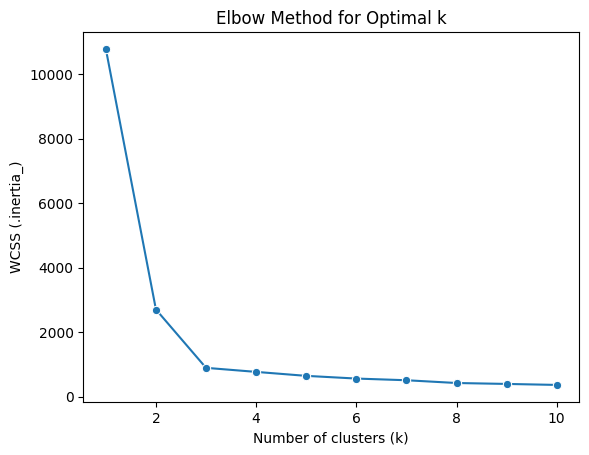

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (.inertia_)')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

In [6]:
kmeans.cluster_centers_

array([[ 5.01916986,  4.9295601 ],
       [-2.08134793, -1.96490516],
       [ 1.9776851 ,  1.89774019]])

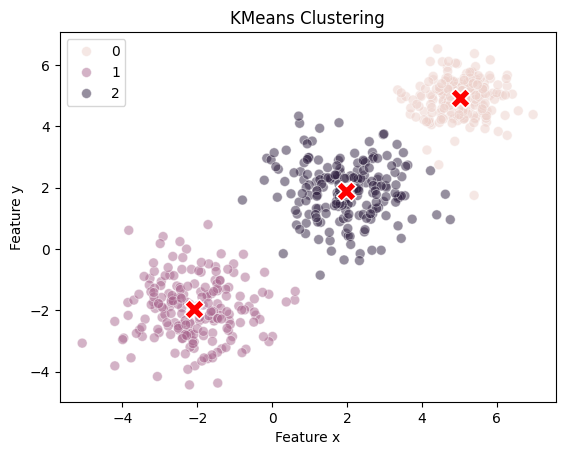

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, s=50, alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', s=200, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()

## KMedoids Clustering using sklearn_extra

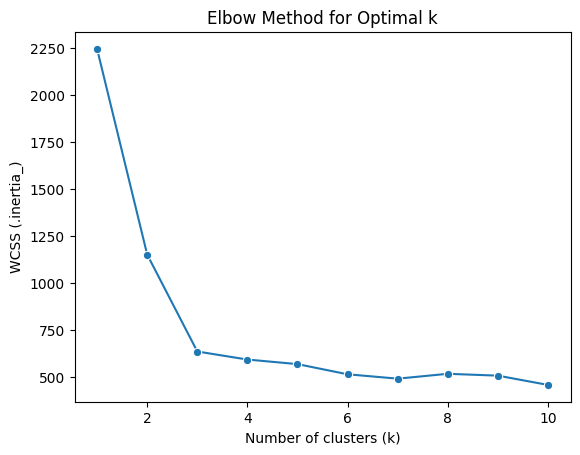

In [8]:
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, metric='euclidean', random_state=42)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)
    
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (.inertia_)')
plt.show()

In [9]:
kmedoids = KMedoids(n_clusters=3, metric='euclidean', random_state=42)
labels = kmedoids.fit_predict(X)

In [10]:
kmedoids.cluster_centers_

array([[ 5.06527158,  4.92634301],
       [ 2.07338928,  1.9686999 ],
       [-1.97444557, -1.85177313]])

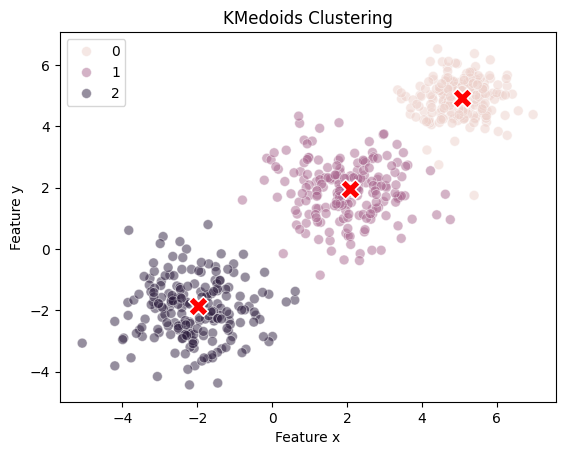

In [11]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, s=50, alpha=0.5)
sns.scatterplot(x=kmedoids.cluster_centers_[:, 0], y=kmedoids.cluster_centers_[:, 1], color='red', s=200, marker='X')
plt.title('KMedoids Clustering')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()

## Manual implimentation of kmeans clustering

In [12]:
class KMeansCustom:
    def __init__(self, X, k, max_iter=100):
        self.X = X
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.distances = None
        self.labels = None

    def initialize_centroids(self):
        '''Randomly initialize k centroids from the dataset'''
        return self.X[np.random.choice(self.X.shape[0], self.k, replace=False)]
    
    def compute_distances(self):
        '''Compute the distance between each point and each centroid'''
        return np.linalg.norm(self.X[:, np.newaxis] - self.centroids, axis=2)

    def assign_clusters(self):
        '''Assign each point to the nearest centroid'''
        return np.argmin(self.distances, axis=1)

    def update_centroids(self):
        '''Update centroids as the mean of the points in each cluster'''
        return np.array([self.X[self.labels==i].mean(axis=0) for i in range(self.k)])

    def kmeans_custom(self):
        '''Custom implementation of KMeans clustering'''
        self.centroids = self.initialize_centroids()
        for _ in range(self.max_iter):
            self.distances = self.compute_distances()
            self.labels = self.assign_clusters()
            new_centroids = self.update_centroids()
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self.labels, self.centroids

In [13]:
kmeans = KMeansCustom(X, 3)
labels, centroids = kmeans.kmeans_custom()

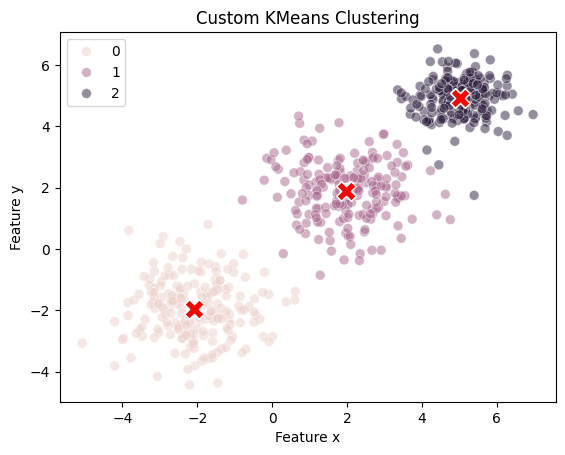

In [14]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, s=50, alpha=0.5)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=200, marker='X')
plt.title('Custom KMeans Clustering')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()

## Manual implimentation of kmedoids clustering

In [15]:
class KMedoidsCustom:
    def __init__(self, X, k, max_iter=100):
        self.X = X
        self.k = k
        self.max_iter = max_iter
        self.medoids = None
        self.distances = None
        self.labels = None

    def initialize_medoids(self):
        '''Randomly initialize k medoids from the dataset'''
        return self.X[np.random.choice(self.X.shape[0], self.k, replace=False)]
    
    def compute_distances(self):
        '''Compute the distance between each point and each medoid'''
        return np.linalg.norm(self.X[:, np.newaxis] - self.medoids, axis=2)

    def assign_clusters(self):
        '''Assign each point to the nearest medoid'''
        return np.argmin(self.distances, axis=1)

    def update_medoids(self):
        '''Update medoids as the medoid of the points in each cluster'''
        medoids = []
        for i in range(self.k):
            cluster_points = self.X[self.labels==i]
            if len(cluster_points) == 0:
                medoids.append(self.X[np.random.choice(self.X.shape[0])])
                continue
            distances = np.sum(np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2), axis=1)
            medoid = cluster_points[np.argmin(distances)]
            medoids.append(medoid)
        return np.array(medoids)

    def kmedoids_custom(self):
        '''Custom implementation of KMedoids clustering'''
        self.medoids = self.initialize_medoids()
        for _ in range(self.max_iter):
            self.distances = self.compute_distances()
            self.labels = self.assign_clusters()
            new_medoids = self.update_medoids()
            if np.allclose(self.medoids, new_medoids):
                break
            self.medoids = new_medoids
        return self.labels, self.medoids

In [16]:
kmedoids = KMedoidsCustom(X, 3)
labels, medoids = kmedoids.kmedoids_custom()

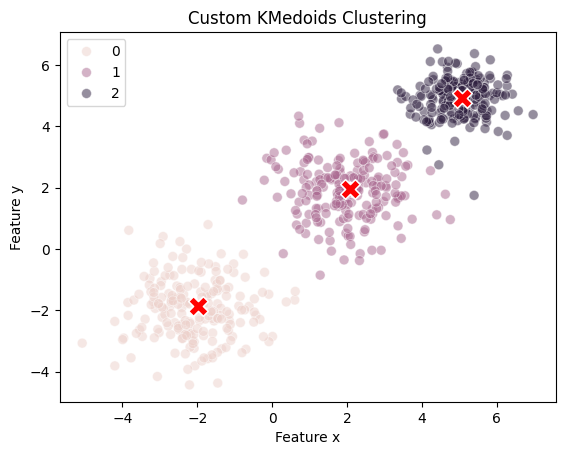

In [17]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, s=50, alpha=0.5)
sns.scatterplot(x=medoids[:, 0], y=medoids[:, 1], color='red', s=200, marker='X')
plt.title('Custom KMedoids Clustering')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()